In [ ]:
!pip install pyLDAvis
!pip install nltk
!pip install stop-words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=5468b751b721a70d3e5207f99667c65f1011d909a41a65e2027636673a3bef33
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from pprint import pprint

In [ ]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
en_stop = get_stop_words('en')
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
remove_words = list(stopwords.words('english'))
additional_stop_words = {"use", "used", "get", "also", "like", "one", "make", "many", "said", "would" , "thing", "look", "way"}
remove_words.extend(additional_stop_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gensim
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-category-dataset")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 26.5M/26.5M [00:01<00:00, 14.9MB/s]

Extracting files...


In [ ]:
!pip install pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

df = pd.read_json(f"{path}/News_Category_Dataset_v3.json", lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(209527, 6)

In [ ]:
df["Description"] = df["headline"]+". " +df["short_description"]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link,headline,category,short_description,authors,date,Description
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


In [ ]:
import nltk
nltk.download('wordnet')
# list for tokenized documents in loop
texts = []

# loop through document list
for i in df['Description'].items():
    # clean and tokenize document string
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if not raw in en_stop]

    # remove stop words from tokens
    # stopped_tokens_new = [raw for raw in stopped_tokens if not raw in remove_words]

    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens]

    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]

    # add tokens to list
    texts.append(new_lemma_tokens)

# sample data
print(texts[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...


['million', 'american', 'roll', 'sleeve', 'omicron', 'targeted', 'covid', 'booster', 'health', 'expert', 'said', 'early', 'predict', 'whether', 'demand', 'match', 'million', 'dos', 'new', 'booster', 'ordered', 'fall']


In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bigram = Phrases(texts, min_count=5, threshold=100)
#trigram = Phrases(bigram[texts], threshold=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigram_mod = Phraser(bigram)
#trigram_mod = Phraser(trigram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts, stop_words):
    stop_words = set(stop_words)
    return [[word for word in doc if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
 #   return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
 #   """https://spacy.io/api/annotation"""
  #  texts_out = []
   # for sent in texts:
    #    doc = nlp(" ".join(sent))
     #   texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    #return texts_out

import re

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z#]", " ", text)  # Remove special characters and numbers
    return text.lower().strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def keep_nouns_verbs(texts, chunk_size=50000):
    """
    Function to filter and keep only the nouns and verbs from a list of texts.
    This function processes text in smaller chunks to avoid memory errors.
    :param texts: List of texts (each text is a list of words).
    :param chunk_size: Number of characters per chunk to process.
    :return: List of texts with only nouns and verbs.
    """
    texts_out = []
    combined_text = " ".join([" ".join(sent) for sent in texts])  # Join all sentences into a single string

    # Process the text in chunks
    for i in range(0, len(combined_text), chunk_size):
        chunk = combined_text[i:i + chunk_size]
        doc = nlp(chunk)  # Process the chunk

        for sent in doc.sents:
            # Extract only the nouns and verbs from each sentence
            sentence = [token.text for token in sent if token.pos_ in ['NOUN']]
            texts_out.append(sentence)

    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
from itertools import chain
# Define functions for stopwords, bigrams, trigrams and lemmatization
# ... (Your existing functions: remove_stopwords, make_bigrams, make_trigrams, lemmatization)

# Call the preprocessing functions to generate texts_out
# Assuming 'texts' is the original list of tokenized documents

data_words_nostops = remove_stopwords(texts,remove_words)
texts_cleaned = [clean_text(" ".join(doc)) for doc in data_words_nostops]
data_words_bigrams = make_bigrams(texts_cleaned)
# data_words_trigrams = make_trigrams(data_words_bigrams) # this is not used. comment it out
# Call lemmatization to modify the variable called data_words_bigrams
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])

# data_lemmatized holds the output of the lemmatization, likely intended to be texts_out
# Pass data_lemmatized to keep_nouns_verbs
texts_out = keep_nouns_verbs(data_words_bigrams)

# Flatten the list of lists
#flat_tokens = [token for sublist in texts_out for token in sublist]
flat_tokens = list(chain.from_iterable(texts_out))
# Create the frequency distribution
freq = nltk.FreqDist(flat_tokens)

# Display the most common words
print(freq.most_common(15))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('e', 1567368), ('r', 1332854), ('o', 1065406), ('t', 788795), ('l', 640869), ('c', 434723), ('h', 370259), ('n', 361885), ('p', 346293), ('d', 306214), ('u', 132248), ('g', 112661), ('m', 100184), ('b', 97919), ('w', 86688)]


In [ ]:
import nltk

# Flatten the list of lists to calculate frequency
flat_tokens = [token for sublist in data_words_nostops for token in sublist]

# Create frequency distribution
freq = nltk.FreqDist(flat_tokens)

# Define the frequency threshold (e.g., remove words that appear less than 5 times)
frequency_threshold = 5

# Get the list of words to keep (words that appear more than the threshold)
words_to_keep = [word for word, count in freq.items() if count >= frequency_threshold]

# Remove low-frequency words from data_words_nostops
data_words_nostops_filtered1 = [
    [word for word in sublist if word in words_to_keep]
    for sublist in data_words_nostops
]

# Check the filtered data
print(data_words_nostops_filtered1[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['million', 'american', 'roll', 'sleeve', 'omicron', 'targeted', 'covid', 'booster', 'health', 'expert', 'early', 'predict', 'whether', 'demand', 'match', 'million', 'dos', 'new', 'booster', 'ordered', 'fall'], ['american', 'airline', 'flyer', 'charged', 'banned', 'life', 'punching', 'flight', 'attendant', 'video', 'subdued', 'passenger', 'crew', 'fled', 'back', 'aircraft', 'confrontation', 'according', 'attorney', 'office', 'los', 'angeles'], ['funniest', 'tweet', 'cat', 'dog', 'week', 'sept', 'dog', 'understand', 'eaten'], ['funniest', 'tweet', 'parent', 'week', 'sept', 'accidentally', 'put', 'grown', 'toothpaste', 'toddler', 'toothbrush', 'screamed', 'cleaning', 'teeth', 'carolina', 'reaper', 'dipped', 'tabasco', 'sauce'], ['woman', 'called', 'cop', 'black', 'bird', 'watcher', 'loses', 'lawsuit', 'ex', 'employer', 'amy', 'cooper', 'accused', 'investment', 'firm', 'franklin', 'unfairly', 'firing', 'branding', 'racist', 'video', 'central', 'park', 'encounter', 'went', 'viral']]


In [ ]:
# Flatten the list of lists to calculate frequency
flat_tokens = [token for sublist in data_words_nostops_filtered1 for token in sublist]

# Create frequency distribution
freq = nltk.FreqDist(flat_tokens)

# Get the top 10 most common words
most_common_words = [word for word, count in freq.most_common(10)]
print("Most common words to remove:", most_common_words)

# Remove the top 10 most common words from data_words_nostops
data_words_nostops_filtered = [
    [word for word in sublist if word not in most_common_words]
    for sublist in data_words_nostops_filtered1
]

# Check the filtered data
print(data_words_nostops_filtered[:5])  # Print the first 5 rows


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Most common words to remove: ['trump', 'new', 'year', 'time', 'day', 'photo', 'people', 'say', 'life', 'woman']
[['million', 'american', 'roll', 'sleeve', 'omicron', 'targeted', 'covid', 'booster', 'health', 'expert', 'early', 'predict', 'whether', 'demand', 'match', 'million', 'dos', 'booster', 'ordered', 'fall'], ['american', 'airline', 'flyer', 'charged', 'banned', 'punching', 'flight', 'attendant', 'video', 'subdued', 'passenger', 'crew', 'fled', 'back', 'aircraft', 'confrontation', 'according', 'attorney', 'office', 'los', 'angeles'], ['funniest', 'tweet', 'cat', 'dog', 'week', 'sept', 'dog', 'understand', 'eaten'], ['funniest', 'tweet', 'parent', 'week', 'sept', 'accidentally', 'put', 'grown', 'toothpaste', 'toddler', 'toothbrush', 'screamed', 'cleaning', 'teeth', 'carolina', 'reaper', 'dipped', 'tabasco', 'sauce'], ['called', 'cop', 'black', 'bird', 'watcher', 'loses', 'lawsuit', 'ex', 'employer', 'amy', 'cooper', 'accused', 'investment', 'firm', 'franklin', 'unfairly', 'firing'

In [ ]:
noun_verbs = keep_nouns_verbs(data_words_nostops_filtered)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # Form Bigrams
data_words_bigrams = make_bigrams(noun_verbs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
id2word.filter_extremes(no_below=5, no_above=0.7)
# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 3), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 2), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 3), (105, 1), (106, 1), (107, 1), (108, 4), (109, 1), (110, 1)

In [ ]:
id2word[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'action'

In [ ]:
frq = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('action', 1),
  ('administration', 1),
  ('adoption', 1),
  ('age', 1),
  ('aid', 1),
  ('air', 2),
  ('aircraft', 1),
  ('airline', 1),
  ('alain', 1),
  ('alarm', 2),
  ('alaska', 1),
  ('alexander', 1),
  ('anniversary', 1),
  ('announcement', 1),
  ('answer', 1),
  ('area', 1),
  ('art', 1),
  ('artist', 1),
  ('artwork', 1),
  ('athlete', 1),
  ('attack', 4),
  ('attention', 1),
  ('attorney', 1),
  ('audience', 1),
  ('author', 1),
  ('authority', 1),
  ('award', 1),
  ('bag', 1),
  ('ballot', 1),
  ('ban', 1),
  ('barrel', 1),
  ('base', 2),
  ('basis', 1),
  ('bathroom', 1),
  ('battle', 1),
  ('benchmark', 1),
  ('bermuda', 1),
  ('bid', 1),
  ('biden', 2),
  ('bill', 1),
  ('bird', 1),
  ('birthday', 1),
  ('blade', 1),
  ('blood', 1),
  ('body', 2),
  ('bombing', 1),
  ('bonus', 1),
  ('book', 1),
  ('booster', 1),
  ('boyfriend', 2),
  ('breathless', 1),
  ('bronx', 1),
  ('building', 1),
  ('campaign', 1),
  ('cancer', 3),
  ('cancer_moonshot', 1),
  ('candidate', 1),
 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


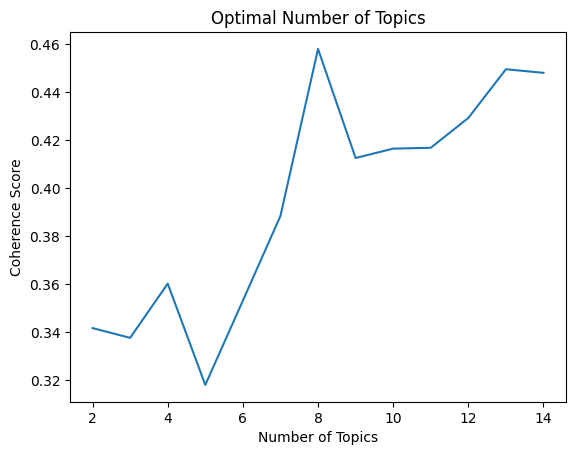

Optimal number of topics: 8


In [ ]:
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=50,
                                       passes=10,
                                       alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

start, limit, step = 2, 15, 1
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus,
                                                        texts=data_words_bigrams, start=start, limit=limit, step=step)

# Plot coherence values to decide the best number of topics
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the optimal model
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print("Optimal number of topics:", optimal_num_topics)

In [ ]:
# Build LDA model
#lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 #                                          id2word=id2word,
  #                                         num_topics=10,
   #                                        random_state=50,
    #                                       update_every=1,
     #                                      chunksize=50,
      #                                     passes=10,
       #                                    alpha='auto',
        #                                   per_word_topics=True)


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=optimal_num_topics,
                                           random_state=50,
                                           passes=10,
                                           alpha=0.7,
                                           per_word_topics=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"holiday" + 0.010*"food" + 0.009*"gift" + 0.009*"family" + '
  '0.007*"child" + 0.006*"world" + 0.006*"resolution" + 0.006*"work" + '
  '0.005*"home" + 0.005*"kid"'),
 (1,
  '0.010*"world" + 0.007*"child" + 0.007*"work" + 0.005*"business" + '
  '0.005*"school" + 0.005*"part" + 0.005*"student" + 0.005*"change" + '
  '0.005*"college" + 0.005*"job"'),
 (2,
  '0.010*"world" + 0.010*"child" + 0.007*"love" + 0.006*"parent" + '
  '0.005*"girl" + 0.005*"mother" + 0.005*"body" + 0.005*"mom" + 0.005*"family" '
  '+ 0.004*"summer"'),
 (3,
  '0.009*"state" + 0.008*"police" + 0.007*"man" + 0.006*"president" + '
  '0.006*"show" + 0.005*"attack" + 0.005*"campaign" + 0.005*"election" + '
  '0.005*"bill" + 0.004*"candidate"'),
 (4,
  '0.010*"world" + 0.009*"election" + 0.007*"country" + 0.006*"week" + '
  '0.006*"community" + 0.005*"policy" + 0.005*"school" + 0.005*"today" + '
  '0.005*"government" + 0.005*"war"'),
 (5,
  '0.030*"week" + 0.027*"video" + 0.008*"night" + 0.007*"game" + 0.00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts = data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.931636108012154

Coherence Score:  0.34986888275651595


In [ ]:
import numpy as np

# Check if there are any complex numbers in the corpus
for doc in corpus:
    for word_id, count in doc:
        if np.iscomplex(count):
            print(f"Complex number found: word_id={word_id}, count={count}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the topics
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models # Import the gensim_models submodule

pyLDAvis.enable_notebook()
# Use gensim_models instead of gensim
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.113081  0.053345       1        1  25.862532
3      0.151814 -0.047333       2        1  22.046634
1      0.060622  0.046320       3        1  13.324671
5      0.045467 -0.041008       4        1   9.785314
2     -0.070249  0.077634       5        1   9.328979
0     -0.088776  0.087993       6        1   8.459483
4      0.145637  0.008239       7        1   8.434681
7     -0.131434 -0.185189       8        1   2.757706, topic_info=         Term         Freq        Total Category  logprob  loglift
732       mom  3773.000000  3773.000000  Default  30.0000  30.0000
2171   mother  2953.000000  2953.000000  Default  29.0000  29.0000
359     video  7679.000000  7679.000000  Default  28.0000  28.0000
371      week  8588.000000  8588.000000  Default  27.0000  27.0000
2769  holiday  2394.000000  2394.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
373      work   146.264554  4403.519267   Topic8  -5.4719   0.1860
165      home   130.312244  4183.278415   Topic8  -5.5873   0.1219
371      week   130.305446  8588.401820   Topic8  -5.5874  -0.5975
163   history   117.608452  2110.208051   Topic8  -5.6899   0.7036
123    family   117.854519  5306.269707   Topic8  -5.6878  -0.2164

[737 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
378       2  0.879145  abortion
378       3  0.007501  abortion
378       7  0.112519  abortion
0         1  0.077621    action
0         2  0.234085    action
...     ...       ...       ...
3395      3  0.002696   youtube
3395      4  0.833009   youtube
3395      5  0.018871   youtube
3395      6  0.005392   youtube
7375      2  0.992291      zika

[2410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 2, 6, 3, 1, 5, 8])

In [ ]:
# Use LdaMulticore instead of LdaMallet
ldamallet = gensim.models.LdaMulticore(corpus=corpus, num_topics=optimal_num_topics, id2word=id2word, random_state=100, passes=10, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts= data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(14,
  [('mother', 0.02851108),
   ('mom', 0.017639251),
   ('video', 0.009971087),
   ('child', 0.009536361),
   ('love', 0.008999896),
   ('week', 0.005721324),
   ('study', 0.005496744),
   ('world', 0.0050543197),
   ('family', 0.004858641),
   ('work', 0.004254983)]),
 (9,
  [('state', 0.006799247),
   ('president', 0.0059669367),
   ('country', 0.0055297646),
   ('week', 0.0043390575),
   ('election', 0.004101036),
   ('family', 0.0037138877),
   ('video', 0.0036787938),
   ('gun', 0.0034863527),
   ('girl', 0.0034644613),
   ('child', 0.0034208517)]),
 (10,
  [('week', 0.011395065),
   ('video', 0.010813722),
   ('child', 0.005815025),
   ('night', 0.0058114035),
   ('world', 0.004438853),
   ('moment', 0.003257659),
   ('dog', 0.003236186),
   ('city', 0.0032012365),
   ('work', 0.0030761352),
   ('story', 0.0030564077)]),
 (15,
  [('world', 0.006744857),
   ('child', 0.0063936585),
   ('week', 0.005857849),
   ('home', 0.004203285),
   ('health', 0.003988715),
   ('night', 0.

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    # Initialize output list
    sent_topics_df = []

    # Loop through each document in the corpus
    for i, row_list in enumerate(ldamodel.get_document_topics(corpus)):
        # Ensure the output is sorted as a list of tuples
        row = sorted(row_list, key=lambda x: x[1], reverse=True)

        # Get the dominant topic, percentage contribution, and keywords
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Get the most dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append([i, topic_num, round(prop_topic, 4), topic_keywords, texts[i]])
            else:
                break

    # Create a DataFrame from the output list
    df = pd.DataFrame(sent_topics_df, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text'])

    return df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_bigrams)

# Format DataFrame
df_dominant_topic = df_topic_sents_keywords.reset_index(drop=True)
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show results
df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.6388,"state, police, man, president, show, attack, c...","[roll_sleeve, booster, health, expert, demand,..."
1,1,3,0.6444,"state, police, man, president, show, attack, c...","[well, team, name, arbiter, judge, role, team,..."
2,2,3,0.7983,"state, police, man, president, show, attack, c...","[police, arrest, disappearance, arrest, disapp..."
3,3,3,0.7162,"state, police, man, president, show, attack, c...","[lawyer, brittney, griner, prison_sentence, la..."
4,4,0,0.2098,"holiday, food, gift, family, child, world, res...","[gon, leukemia]"
5,5,0,0.2000,"holiday, food, gift, family, child, world, res...","[season, wait]"
6,6,3,0.6295,"state, police, man, president, show, attack, c...","[pole, world, record, comparison, pole, jungle..."
7,7,3,0.7037,"state, police, man, president, show, attack, c...","[star, clue, musician, singing, pill, album, c..."
8,8,3,0.3817,"state, police, man, president, show, attack, c...","[school, home, death, tribute, condolence, act..."
9,9,3,0.6958,"state, police, man, president, show, attack, c...","[pool, bull, animal, activist, slaughter, anim..."


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

# Grouping by 'Dominant_Topic'
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(5)],
                                            axis=0)

# Drop the 'Document_No' column if it's not needed
sent_topics_sorteddf_mallet = sent_topics_sorteddf_mallet.drop(columns=['Document_No'])

# Rename the remaining columns
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show the first few rows
sent_topics_sorteddf_mallet.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
6128,0,0.8329,"holiday, food, gift, family, child, world, res...","[need, trip, store, conversation, illness, sha..."
6412,0,0.7815,"holiday, food, gift, family, child, world, res...","[molecule, alpha, acid, holiday, care, celebra..."
7082,0,0.7337,"holiday, food, gift, family, child, world, res...","[deal, remorse, welcome, dollar, dish, living,..."
6106,0,0.7313,"holiday, food, gift, family, child, world, res...","[involvement, balance, family, tech, activity,..."
6078,0,0.7266,"holiday, food, gift, family, child, world, res...","[percent, week, mind, body, well, family, vogu..."
3755,1,0.8143,"world, child, work, business, school, part, st...","[parent, data, hurt, career, database, child, ..."
3569,1,0.8056,"world, child, work, business, school, part, st...","[attack, history, strive, principle, society, ..."
3824,1,0.7557,"world, child, work, business, school, part, st...","[cyclone, approach, cop, killer, halloween, su..."
3394,1,0.7532,"world, child, work, business, school, part, st...","[brand, starting, point, kid, light, nation, b..."
3870,1,0.7474,"world, child, work, business, school, part, st...","[pause, stock, learn, experience, future, job,..."


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts / topic_counts.sum(), 4)

# Topic Number and Keywords (remove 'Topic_Keywords' mismatch)
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Keywords']].drop_duplicates()

# Concatenate column-wise
df_dominant_topics = topic_num_keywords.set_index('Dominant_Topic').join(
    pd.concat([topic_counts, topic_contribution], axis=1, keys=['Num_Documents', 'Perc_Documents'])
)

# Reset the index
df_dominant_topics.reset_index(inplace=True)

# Change column names (if necessary)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Sort by percentage of documents
df_dominant_topics = df_dominant_topics.sort_values(by=['Perc_Documents'], ascending=False)

# Show
df_dominant_topics.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,3,"state, police, man, president, show, attack, c...",2296,0.3169
4,6,"wedding, video, child, divorce, week, fashion,...",1922,0.2652
3,1,"world, child, work, business, school, part, st...",882,0.1217
1,0,"holiday, food, gift, family, child, world, res...",680,0.0938
5,5,"week, video, night, game, film, show, animal, ...",555,0.0766
